In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math


# Dealing With Imbalanced Data

Take credit card fraud, most transactions are not fraud. A few are, and it is important that those are the ones that we notice. What do we do?

The <b>Class</b> varaible is the target, the other stuff is all of the things we know about each transaction. We can effectively think of these things as "things that Mastercard knows" about each transaction - store the puchase was at, was the card swiped, tapped, or inserted, was this transaction in the same city as the last one, time of day, etc... 

<b>Note:</b> The data here is real, from MasterCard, the weird values is because the data was put through something called PCA before being shared with the public. PCA is a way to reduce the dimensionality (reduce number of features), it also renders the results unrecognizable - here it has been done so that the CC company doesn't share any private stuff. We will look at PCA during the ML stuff, for now we can consider it similarly to one-hot encoding - we put the data through the transformation, and it spits out a dataset that is ready to model with, but not very readable for a human. 

# 處理不平衡數據

以信用卡欺詐為例，大多數交易都不是欺詐。有一些是，重要的是那些是我們注意到的。我們做什麼？

<b>Class</b> 變量是目標，其他內容是我們對每筆交易了解的所有內容。

我們可以有效地將這些事情視為關於每筆交易的“萬事達卡知道的事情”——購物所在的商店，刷卡、竊聽或插入卡，這次交易是否與上次交易在同一個城市，一天中的時間， ETC...

<b>注意：</b> 這裡的數據是真實的，來自萬事達卡，奇怪的值是因為數據在與公眾共享之前通過了一種叫做 PCA 的東西。 

PCA 是一種降低維度（減少特徵數量）的方法，它也會使結果變得無法識別——這裡已經這樣做了，這樣 CC 公司就不會共享任何私人的東西。

我們將在 ML 的過程中研究 PCA，現在我們可以將其視為類似於 one-hot 編碼——我們對數據進行轉換，它吐出一個準備好建模的數據集，但對於人類。

In [2]:
df = pd.read_csv("data/creditcard.csv.zip")
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
174708,122032.0,-2.273872,-1.903299,-3.066875,-1.359535,-1.725481,-0.087902,2.565871,-4.136205,-1.898541,...,-0.721295,1.338069,-5.082619,0.318355,-1.102652,-0.050545,1.001368,0.021852,1500.00,0
174195,121814.0,2.042924,0.052744,-1.856767,0.221120,0.628483,-0.340911,0.067962,-0.052565,0.298360,...,-0.335998,-0.927875,0.275979,0.093064,-0.248950,0.177859,-0.070247,-0.043621,9.99,0
59843,49031.0,-2.176831,-1.612809,1.476216,-0.566712,0.040557,-0.112498,-0.895179,1.017769,0.582263,...,0.115650,-0.462478,0.206161,-0.295563,-0.140901,0.805082,-0.181412,-0.316253,125.00,0
148260,89641.0,-0.767023,0.223222,1.544475,3.306588,-1.254080,2.120090,-0.646126,1.043271,0.422727,...,0.176522,0.884834,0.352722,-0.519061,-0.764482,-0.047887,-0.118940,-0.123617,152.13,0
70934,54079.0,1.308457,-1.176200,-0.022869,-1.397037,-1.222895,-0.639747,-0.643778,-0.054389,-2.277189,...,-0.385180,-0.995555,0.148532,0.143905,0.140944,-0.453468,-0.005713,0.013661,84.90,0
100878,67654.0,-0.826394,0.064140,2.539931,1.167951,0.255758,-0.245180,0.145868,-0.400984,0.623481,...,-0.037569,0.521500,-0.093041,0.434986,-0.551456,-0.492791,-0.330237,-0.182458,9.99,0
165846,117703.0,0.165624,-0.527267,-0.436398,-1.901247,0.983486,-0.263565,0.171816,-0.276911,-0.976548,...,0.487896,1.427465,-0.328613,-1.404629,-0.358758,0.054557,-0.215517,-0.085868,21.60,0
220795,142304.0,2.267610,-1.651586,-1.335207,-1.615751,-0.682351,0.699938,-1.277189,0.165775,-0.793407,...,-0.542606,-0.933292,0.211358,-0.401975,-0.086147,-0.305538,0.009228,-0.066303,29.25,0
168628,119312.0,1.918177,-0.264101,-0.802759,0.954060,0.196860,0.539304,-0.374121,0.130114,0.628510,...,-0.222134,-0.635082,0.162029,-1.453850,-0.236885,-0.921645,0.041567,-0.040207,52.45,0
141993,84546.0,1.256260,-0.747700,1.086004,-0.582765,-1.472573,-0.433143,-1.026673,0.017618,-0.499231,...,0.452536,1.257467,-0.062366,0.457871,0.316713,-0.044127,0.052530,0.031455,39.00,0


### Look at the Target's Distribution

Most things are legitimate transactions, a few of those are frauds. What is the breakdown? 

In [3]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Fraud is a 1 in the class value - there is not much fraud! We could be REALLY accurate if we made a dumb model...

0.9982725143693799


<AxesSubplot:xlabel='Class', ylabel='count'>

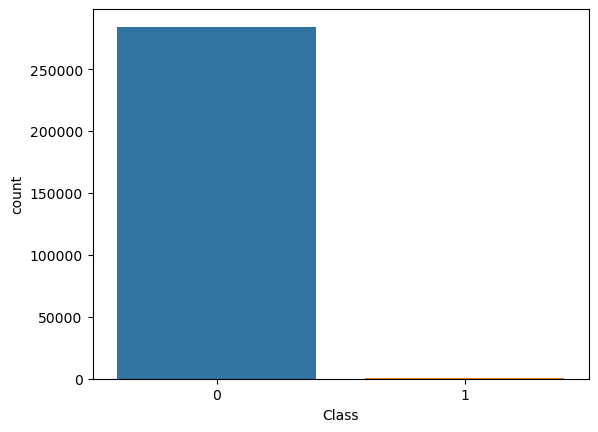

In [4]:
print(len(df[df["Class"]==0])/len(df))
sns.countplot(data=df, x="Class")

#### Target Distribution Results

If our model just guessed NO every time, we'd be 99.8% accurate - really good, but also useless for the application at hand. We'd be technically correct, which is the best kind of correct, but we would not do a great job.  

### Regular Model

First, we'll make a model without doing anything, to see the results. 

#### Exploration

We won't explore the data a tonne here, but one of the things that we'd probably want to start with would be looking to see if there is a decided difference in the distributions of all the different variables between fraudulent transactions and normal ones. If there are values that are drastically different, those are likely things that are significant in predicting fraud...

We can do a little exercise to generate a sequence of boxplots for each varaible, split by the class. 

#### SubPlots

This is the "normal" way of making a grid of visualizations. We use the plt/subplots() function to create the set of subplots and it returns two things:
<ul>
<li> The first returned value, f, is the figure - the entire graph object. 
<li> The second returned value, axes, is the "grid" of spaces. In each graph we specify, with two indicies, where that graph will be placed in the grid. It is basically a 2D array. 
</ul>

For something like this, we will try looking at boxplots rather than the normal histogram or pdf. The effect is the same, we can eyeball the general patterns of the distribution, but for this data I think the boxplots show it a bit more clearly. 

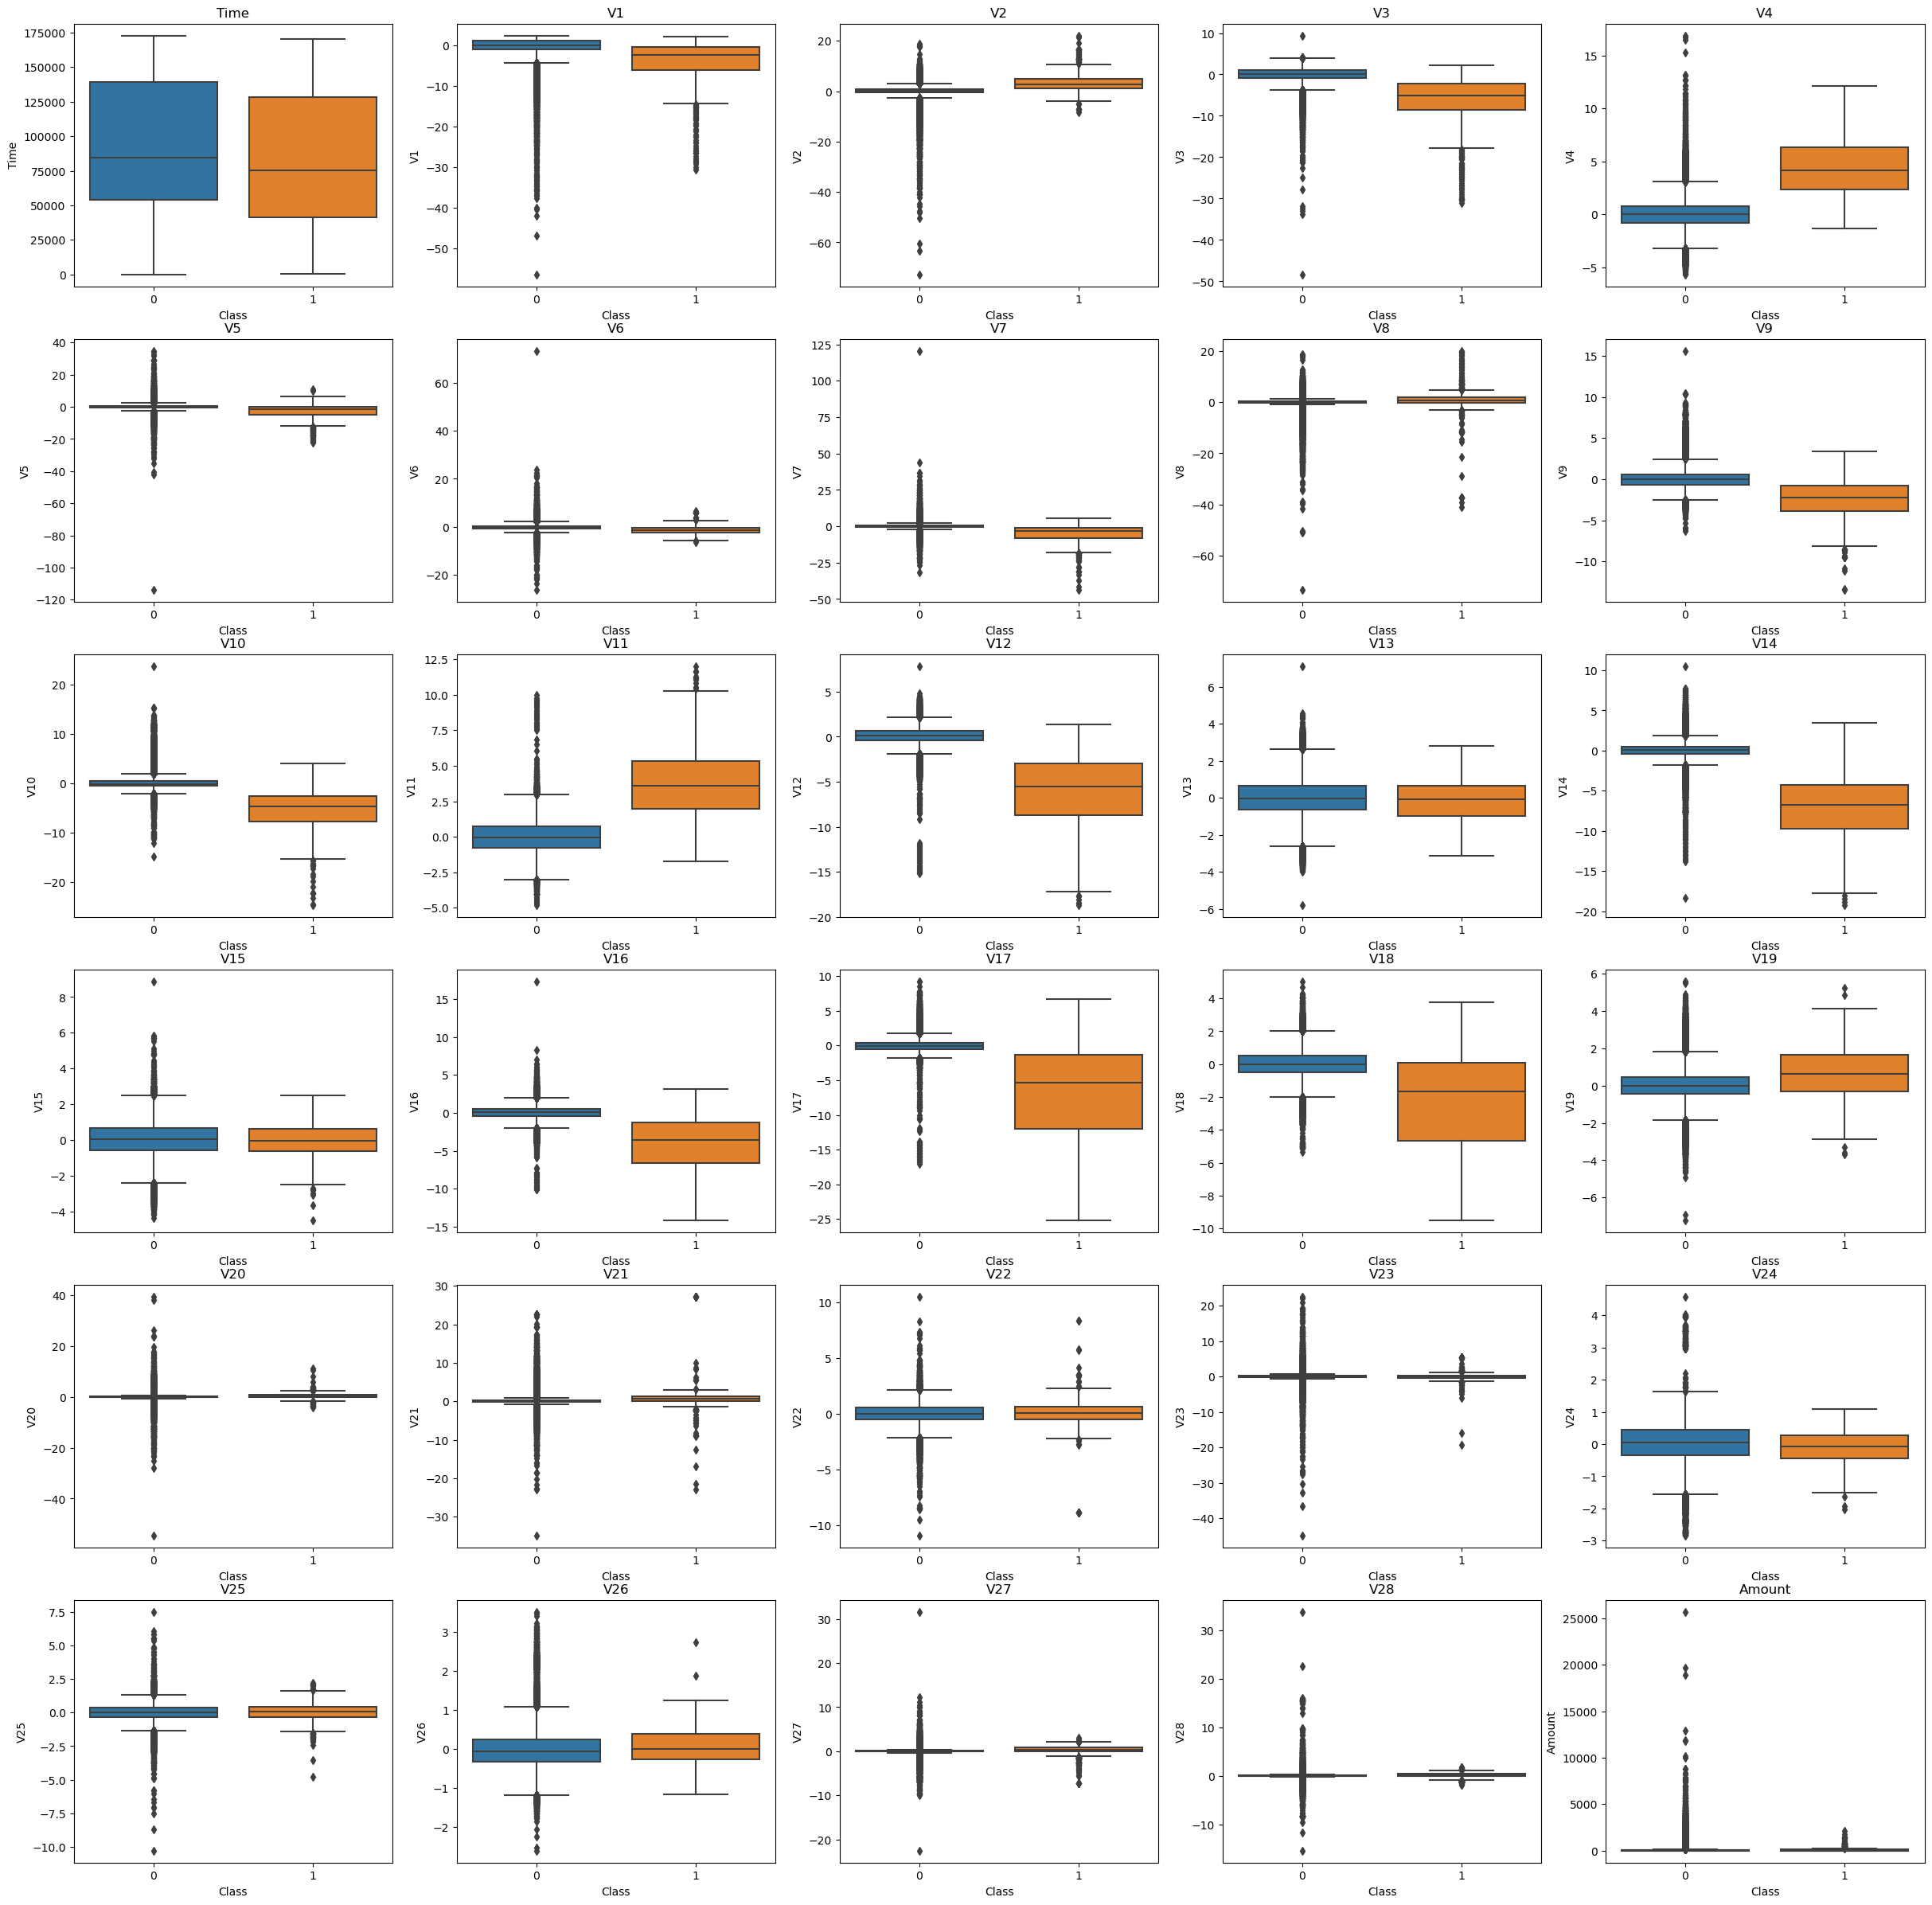

In [5]:
#Visualize differences
feats = df.drop(columns={"Class"}).columns
gCols = 5
#gRows = math.ceil( (len(feats) - 1) /gCols )
gRows = math.ceil( len(feats) /gCols )

f, axes = plt.subplots(ncols=gCols, nrows=gRows, figsize=(30,30))
i = 0
q = 0
for column in feats:
    #sns.kdeplot(data=df, x=str(column), hue="Class", ax=axes[q][i])
    sns.boxplot(x="Class", y=str(column), data=df, ax=axes[q][i])
    axes[q][i].set_title(str(column))
    i += 1
    if i >= gCols:
        i = 0
        q += 1

Some varaibles, like V13, show very little difference between fraudulent and not fraudulent transactions. Others like V14 seem to show some substantial difference between legit and fraud transactions. We can suspect that those with a difference will likely be our most relevant features in making predictions. However, this is only a suspicion - for example, combinations of varaibles might contain lots of the predictive value, and those aren't really that visible.  

First, we can builld a basic model, and see what our accuracy is without any maniplation. 

一些變量，如 V13，顯示欺詐交易和非欺詐交易之間的差異很小。 其他類似 V14 的交易似乎顯示出合法交易和欺詐交易之間存在一些實質性差異。 我們可以懷疑那些有差異的可能是我們進行預測時最相關的特徵。 然而，這只是一種懷疑——例如，變量的組合可能包含很多預測值，而這些並不是真正可見的。

首先，我們可以建立一個基本模型，看看我們在沒有任何操作的情況下的準確性。

(190820, 30) (190820, 1) (93987, 30) (93987, 1)
F1: 0.6170212765957448
Acc: 0.9988509049123815
Recall: 0.4702702702702703
Precision: 0.8969072164948454


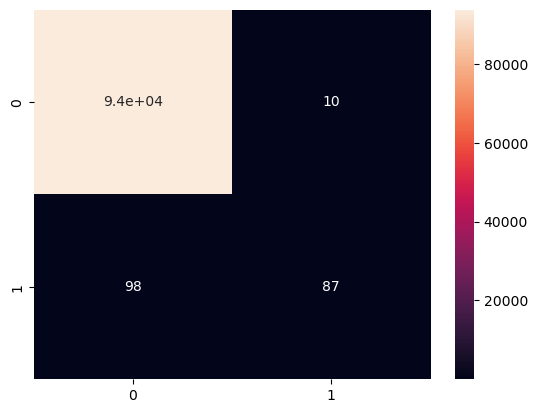

In [6]:
#Build Log Reg model
#Split Data x/y
y1 = np.array(df["Class"]).reshape(-1,1)
x1 = np.array(df.drop(columns={"Class"}))

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.33)

print(X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape)
#Normalize data
scaler = MinMaxScaler()
X_train1_norm = scaler.fit_transform(X_train1)
X_test1_norm = scaler.transform(X_test1)

#Train model
model1 = LogisticRegression().fit(X_train1_norm,y_train1.ravel())

#Make predictions
preds1 = model1.predict(X_test1_norm)

#Generate 1/0 results and show results
labels1 = binarize(np.array(preds1).reshape(-1,1), threshold=.5)
conf_matrix1 = confusion_matrix(y_test1,labels1)
sns.heatmap(conf_matrix1, annot=True)

print("F1:",f1_score(y_test1, labels1))
print("Acc:",accuracy_score(y_test1, labels1))
print("Recall:",recall_score(y_test1, labels1))
print("Precision:",precision_score(y_test1, labels1))

### Simple Model Results

Overall accuracy is of course high. We do have a bunch of frauds that we are missing, however - we can try to resolve this... hopefully. We are also almost always just guessing "not fraud", which results in high accuracy, but isn't the most useful solution. What we probably want to look at more than the accuracy here is the Recall and the F1. Recall is a metric of how many frauds we are detecting, so we want it to be high. F1 is a balance of recall and precision (how many of the frauds that we detect are real), so this is also a consideration - we don't want to be accusing innocent card holders!

### 簡單模型結果

總體準確率當然很高。 我們確實有很多我們遺漏的欺詐行為，但是 - 我們可以嘗試解決這個問題......希望如此。

我們也幾乎總是只是猜測“不是欺詐”，這會導致高精度，但不是最有用的解決方案。 除了這裡的準確性，我們可能更想看的是 Recall 和 F1。 

召回率是我們檢測到的欺詐數量的指標，因此我們希望它很高。 

F1 是召回率和精確率的平衡（我們檢測到的欺詐有多少是真實的），所以這也是一個考慮因素——我們不想指責無辜的持卡人！

## Data Transformations for Imbalanced Data

We can manipulate our dataset to generate training data that is better suited to training our model. The lack of balance between the two target classes "makes it hard" for our model to learn to make reliable predictions - it wants to be accurate, and the easiest way to be accurate is to just guess "not fraud". To attempt to negate this we can just make our dataset more equal and use that to train the model. 

We are still testing against that set aside testing dataset, so our evaluation of accuracy stays constant. 

<b>Note:</b> when doing things like resampling we are obviously changing the original dataset, and making it into something it isn't. This can feel wrong, but if we step back we can see it is ok. Our goal is not to maintain an accurate set of training data, our interest is to make an accurately predicting model. If changing our data allows the model to become better, that's fine - even if the underlying data is "wrong" or altered. If you've ever trained for a sport, this is kind of similar to that - you might practice shooting a basketball with one hand, or swing a heavier baseball bat, or practice just the last little wrist-flick part of a hockey shot over and over - you're changing the "training material" (what you practice) to be something that is different from the actual sport, in order to allow that training to make the main thing you care about better. This is the same, if changed data lets the model learn, then we are OK with it. In practice, we can even generate synthetic training data, we'll look at that a bit around when we look at neural networks. 


## 不平衡數據的數據轉換

我們可以操縱我們的數據集來生成更適合訓練我們模型的訓練數據。

兩個目標類別之間缺乏平衡“使我們的模型很難”學會做出可靠的預測——它想要準確，而最簡單的準確方法就是猜測“不是欺詐”。

為了試圖否定這一點，我們可以讓我們的數據集更平等，並用它來訓練模型。

我們仍在針對該預留測試數據集進行測試，因此我們對準確性的評估保持不變。

<b>注意：</b>在進行重採樣之類的操作時，我們顯然是在更改原始數據集，並將其變成原來的數據集。

這可能感覺不對，但如果我們退後一步，我們可以看到它沒問題。我們的目標不是維護一組準確的訓練數據，我們的興趣是建立一個準確的預測模型。

如果改變我們的數據可以讓模型變得更好，那很好——即使基礎數據是“錯誤的”或改變的。

如果您曾經接受過某項運動的訓練，那麼這有點類似於那種——您可能會練習用一隻手投籃，或者揮動更重的棒球棒，或者只練習曲棍球投籃的最後一點手腕輕彈部分及以上 - 

您正在將“培訓材料”（您練習的內容）更改為與實際運動不同的東西，以便讓該培訓使您關心的主要事情變得更好。

這是一樣的，如果改變的數據讓模型學習，那麼我們就可以接受。在實踐中，我們甚至可以生成合成訓練數據，我們將在研究神經網絡時稍微了解一下。

### Undersampling and Oversampling

There are two basic approaches we can take to making the data more balanced:
<ul>
<li> Undersampling - limit the quantity of records, so all of the macjority class records are not included. 
<li> Oversampling - repeat the minority class records multiple times, so there is a balanced number. 
</ul>

![Sampling](images/sampling.png "Sampling")

Within each of these there are assorted approaches, but this is the basic idea - we make the groups more equal in count by limiting what we have a lot of, or replicating what we have a few of. 

### Undersampling

The most simple way to approach this is to undersample the not frauds - just leave a bunch out. That one kind of has a downside - we're leaving behind all that potentially valuable data!

We can create a simple undersampler and test it. We will use all the fraudulent data, and randomly select non-fraud data so that we have a balanced number of records on each side. This chops out a bunch of data, but it will give us an equal number of fraud/good, so our dumb approach of always guessing NO won't work with this data. Note that the test dataest is really large here - since our training data is limited, there's not much, if any, downside to just using the rest of the records as test data. 

###欠採樣

解決這個問題的最簡單方法是對非欺詐行為進行低採樣——只留下一堆。 

那種方式有一個缺點——我們會留下所有潛在有價值的數據！

我們可以創建一個簡單的欠採樣器並對其進行測試。 我們將使用所有欺詐數據，並隨機選擇非欺詐數據，以便我們在每一方都有平衡的記錄數。 

這切掉了一堆數據，但它會給我們相同數量的欺詐/好，所以我們總是猜測 NO 的愚蠢方法不適用於這些數據。 

請注意，這裡的測試數據量非常大 - 由於我們的訓練數據有限，因此僅使用其餘記錄作為測試數據的缺點並不多（如果有的話）。

(694, 30) (694, 1) (85443, 30) (85443, 1)
F1: 0.30750893921334926
Acc: 0.9932001451259904
Recall: 0.8896551724137931
Precision: 0.18587896253602307


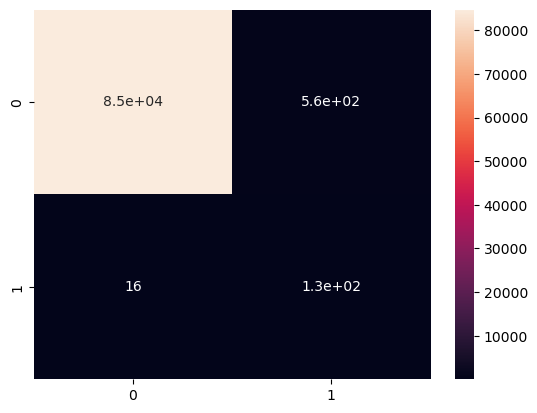

In [7]:
#Undersample
#Split the data into test train
train2, test2 = train_test_split(df, test_size=.3)
#Prep the test data by splitting x/y
y_test2 = np.array(test2["Class"]).reshape(-1,1)
X_test2 = np.array(test2.drop(columns={"Class"}))

#Manually resample the training data
df_NonFrauds = train2[train2["Class"]==0]
df_Frauds = train2[train2["Class"]==1]
df_NF = df_NonFrauds.sample(len(df_Frauds))
df_Under = pd.concat([df_NF, df_Frauds])
y_train2 = np.array(df_Under["Class"]).reshape(-1,1)
X_train2 = np.array(df_Under.drop(columns={"Class"}))
print(X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape)
#Normalize data
scaler2 = MinMaxScaler()
X_train2_norm = scaler2.fit_transform(X_train2)
X_test2_norm = scaler2.transform(X_test2) 

#Train model
model2 = LogisticRegression().fit(X_train2_norm,y_train2.ravel())

#Make predictions
preds2 = model2.predict(X_test2_norm)

#Generate 1/0 results and show results
labels2 = binarize(np.array(preds2).reshape(-1,1), threshold=.5)
conf_matrix2 = confusion_matrix(y_test2,labels2)
sns.heatmap(conf_matrix2, annot=True)

print("F1:",f1_score(y_test2, labels2))
print("Acc:",accuracy_score(y_test2, labels2))
print("Recall:",recall_score(y_test2, labels2))
print("Precision:",precision_score(y_test2, labels2))

#### Undersampling Results

Our overall accuracy is still high, but not very relevant. We have improved our Recall, so we are catching more fraud. on the downside, our precision has fallen, and we are accusing too many people of stealing unfairly! As well, we'd expect very wide variation of results for this - we're plucking out a small percentage of non-frauds and ignoring the rest; random variation will probably be significant from run to run. 

We can probably beat that, at least we hope. We can try to oversample the missing value, or include it more. 

####欠採樣結果

我們的整體準確性仍然很高，但不是很相關。 我們提高了召回率，因此我們發現了更多欺詐行為。 

不利的一面是，我們的精度下降了，我們指責太多人不公平地偷竊！ 

同樣，我們預計結果會有很大差異——我們將剔除一小部分非欺詐並忽略其餘部分； 每次運行的隨機變化可能都很重要。

我們可能會打敗它，至少我們希望如此。 我們可以嘗試對缺失值進行過採樣，或者更多地包含它。

### Oversampling

Now we can try to oversample, or duplicate the fraudulent examples in the training data until we have a balanced dataset. We will take the fraudulent records and use sampling with replacement (the records sampled are returned to the pool after they are taken), to "build up" the fraudulent part of the dataset to be the same size as the non-fraudulent ones. 

### 過採樣

現在我們可以嘗試過度採樣，或者復制訓練數據中的欺詐示例，直到我們擁有一個平衡的數據集。 

我們將獲取欺詐記錄並使用有放回抽樣（抽樣的記錄在獲取後返回到池中），以“建立”數據集的欺詐部分，使其與非欺詐部分的大小相同。

(398058, 30) (398058, 1) (85443, 30) (85443, 1)
F1: 0.13043478260869565
Acc: 0.9784651756141521
Recall: 0.8789808917197452
Precision: 0.07044410413476264


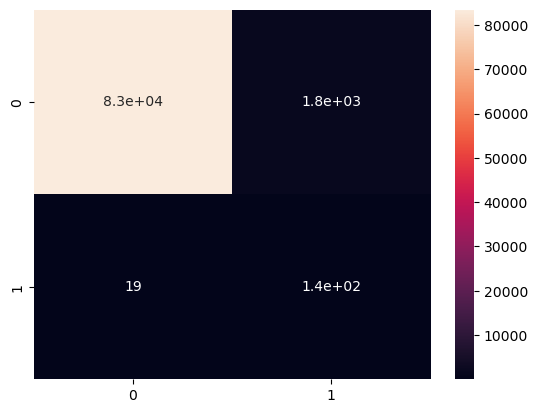

In [8]:
#Oversample
#Split the data into test train
train3, test3 = train_test_split(df, test_size=.3)
#Prep the test data by splitting x/y
y_test3 = np.array(test3["Class"]).reshape(-1,1)
X_test3 = np.array(test3.drop(columns={"Class"}))

#Manually resample the training data
df_NonFrauds = train3[train3["Class"]==0]
df_Frauds = train3[train3["Class"]==1]
df_F = df_Frauds.sample(len(df_NonFrauds), replace=True)
df_Under = pd.concat([df_NonFrauds, df_F])
y_train3 = np.array(df_Under["Class"]).reshape(-1,1)
X_train3 = np.array(df_Under.drop(columns={"Class"}))

print(X_train3.shape, y_train3.shape, X_test3.shape, y_test3.shape)
#Normalize data
scaler3 = MinMaxScaler()
X_train3_norm = scaler3.fit_transform(X_train3)
X_test3_norm = scaler3.transform(X_test3) 

#Train model
model3 = LogisticRegression(max_iter=10000).fit(X_train3_norm,y_train3.ravel())

#Make predictions
preds3 = model3.predict(X_test3_norm)

#Generate 1/0 results and show results
labels3 = binarize(np.array(preds3).reshape(-1,1), threshold=.5)
conf_matrix3 = confusion_matrix(y_test3,labels3)
sns.heatmap(conf_matrix3, annot=True)

print("F1:",f1_score(y_test3, labels3))
print("Acc:",accuracy_score(y_test3, labels3))
print("Recall:",recall_score(y_test3, labels3))
print("Precision:",precision_score(y_test3, labels3))

#### Oversample Results

Still not crushing it... Recall is good, but we're again accusing everyone of fraud! Our precision sucks. 

## More Sophisticated Sampling - With Library Functions

If we look at the above, we don't really improve accuracy, in fact we're overall worse than the dumb model. We do get somewhat better on some of the metrics, some of the time, but not really in a way that is excellent. 

We can use some more sophisticated library functions to attempt to make this better. 

<b>Note:</b> you likely need to install the imblearn package. Open a terminal, and type either "pip install imblearn" or "conda install imblearn", one of those should work. You may need to save and reopen this file to force it to update.

## 更複雜的採樣 - 使用庫函數

如果我們看上面的內容，我們並沒有真正提高準確性，事實上我們總體上比啞模型還差。 

在某些時候，我們確實在某些指標上取得了一些進步，但並不是以一種非常出色的方式。

我們可以使用一些更複雜的庫函數來嘗試讓它變得更好。

<b>注意：</b>您可能需要安裝 imblearn 包。 

打開一個終端，然後輸入“pip install imblearn”或“conda install imblearn”，其中一個應該可以工作。 

您可能需要保存並重新打開此文件以強制其更新。

In [9]:
# Uncomment the row below and run to install imblearn package. 
# This assumes that you have pip, if not try "!conda install pip", then retry. 
#!pip install imblearn

In [10]:
!conda install pip

^C


In [11]:
!pip install imblearn

In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## 重採樣函數、決策邊界和數據生成

我們可以利用這些隨機的過/欠採樣器來幫助我們更輕鬆地完成我們上面所做的事情。

這些重採樣庫在選擇方面也比隨機庫更聰明——每個庫的工作方式都不同，

但它們通常會尋找有助於構建<i>歧視性</i>模型的記錄，或者非常擅長將真值與真值分離的記錄假的，或者從不欺詐的欺詐。

在下面的代碼中有一大堆不同的採樣策略。有很多！我們有一些可以嘗試的。過採樣/欠採樣正是我們在上面所做的。

其他人使用一些更複雜的方法來進行抽樣。我們可以嘗試的一些是：
<ul>
<li>SMOTE - 過採樣。很常見。定義：“SMOTE 的工作原理是選擇特徵空間中接近的示例，在特徵空間中的示例之間畫一條線，然後沿著該線繪製一個新樣本作為一個點。”

<li>Tomek 鏈接 - 欠採樣。定義：“Tomek Links 是指一種用於識別數據集中具有不同類別的最近鄰對的方法。

刪除這些對中的一個或兩個示例（例如多數類中的示例）具有做出決策的效果訓練數據集中的邊界噪音較小或不明確。”

<li>ADASYS - 過採樣。與 SMOTE 類似，但它根據對要過採樣類的局部分佈的估計生成不同數量的樣本
</ul>

通常，過採樣和欠採樣都相當普遍。我們可能會看到它使用的常見地方是統計調查類型 - 

當加拿大統計局對加拿大各地的數千人進行調查時，這可能足以進行一般估計。

但是，如果存在數量較少的人口統計子組，則對數據進行的分析可能會對它們進行過度採樣，以確保它們在數據中得到體現。

同樣，非常大的數據集（例如穀歌用來預測廣告的數據集）使用欠採樣來減少大量數據。

## Resampling Functions, Decision Boundaries, and Data Generation

We can utilize these random over/under samplers to help us out and do what we did above a little bit more easily. These resampling libraries are also smarter than random in what they select - each one works differently, but they are generally looking for records that will help build a <i>discriminatory</i> model, or one that is very good at splitting true from false, or fraud from not fraud. 

In the code below there are a whole bunch of different sampling strategies. There are a lot! We have a handful in there that we can try. The over/under sampling ones are just what we did above. The others use some more involved methods to do the sampling. A few that we can try are:
<ul>
<li>SMOTE - Oversampling. Very common. Definition: "SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample as a point along that line."
<li>Tomek Links - Undersampling. Definition: "Tomek Links refers to a method for identifying pairs of nearest neighbors in a dataset that have different classes. Removing one or both of the examples in these pairs (such as the examples in the majority class) has the effect of making the decision boundary in the training dataset less noisy or ambiguous."
<li>ADASYS - Oversampling. Similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled
</ul>

In general, both oversampling and undersampling are fairly common. Common places that we may see it used is in survey types of statistics - when Stats Canada takes a survey of a few thousand people accross Canada, that is likely enough for general estimation. However, if there are demgraphic subgroups that have small numbers, analysis done with the data may oversample them to ensure that they are represented in the data. As well, very large datasets such as the ones used by Google to predict advertising use undersampling to reduce the massive amount of data. 

### Data Generation

These smart resampling aren't only doing the random slection that my simple code above did, they are (often) actually generating new data in the process. We call new data that is created for the purposes of training models, synthetic data. To understand how and why, we need to look at what classification models are attempting to do - separate True from False. Rather than just repeating the minority class over and over like I did above, they can generate variations based on that minority data. The goal here is to "bulk out" the minority class in the training data with more records that are plausible, but not real; this synthetic data should "look like" the real data as much as is possible. 

Generating training data is something that is reasonably common - in some cases it can work very well, in others we introduce error. Like many things, we'd need to see how it works with our data, and evaluate the results. 

### Decision Boundaries

<b>Notes:</b> 
<ul>
<li> For this, assume we are looking at data with 2 features only, so we can picture it. 
<li> We'll look at this in more depth when we explore more classification algorithms. 
</ul>

Our classification models, if we are to visualize them, are attempting to establish good "decision boundaries", or "lines" that can separate the two classes - things on one side are labeled True, on the other they are false. The more discriminatory this boundary is, or the better job it does are separating the two classes, the more accurate our model will be. 

To extend on this idea, what we really care about is what happens "along" that boundary, since that is where all of the edge cases sit. Consider if you had a model that classifies people into sumo wrestlers or basketball players - people who are 7'2" or people who are 400 pounds are pretty easy to put in one group or another - it is dividing the people that could go either way that really matter. Our data poses the same issue, just a bit larger and more complex. 

![Boundary](images/boundary.png "Boundary")

The sharper this line is in dividing the samples, the better our model will be. We are currently using logistic regression, which is linear, which will generate linear decision boundaries. This isn't a limitation for other types of algorithms, we can split things accurately when the boundaries are not linear, we just need some different tools that we'll look at with some of our different classification algorithms. 

#### SMOTE - Oversampling

![SMOTE](images/smote.png "SMOTE")

SMOTE generates samples that are similar to those that already exist, by creating new samples that are "in-between" the other samples. 

#### Tomek Links - Undersampling

![Tomek](images/tomek.png "Tomek")

Tomek links, or the Tomek links algorithm, looks for pairs of points along that decision boundary that are similar. The algorithm then removes the majority point from the pair (usually, there are a few options). This acts to "clean" the decision boundary between the two sets of data, and offer our logistic regression a more clear place to "draw a line" between the two sets. 

#### SMOTETomek - Combinations

![SMOTETomek](images/smotetomek.png "SMOTETomek")

These imbalanced preparation steps can also be combined. For example, one combination is the SMOTETomek algorithm, which does both of the above:
<ul>
<li> A - Original imbalanced data. 
<li> B - Use SMOTE to generate an oversampled dataset. 
<li> C - Generate "tomek links" of the similar pairs on the boundaries. 
<li> D - Use the majority removal part to delete those records from the pairs. 
<li> Result - the decision boundaries (not linear in this case, we'll deal with this in ML) are more clear. 
</ul>

這些不平衡的準備步驟也可以結合起來。 例如，一種組合是 SMOTETomek 算法，它執行以上兩項操作：
<ul>
<li> A - 原始不平衡數據。
<li> B - 使用 SMOTE 生成過採樣數據集。
<li> C - 生成邊界上相似對的“tomek 鏈接”。
<li> D - 使用多數刪除部分從對中刪除這些記錄。
<li> 結果 - 決策邊界（在這種情況下不是線性的，我們將在 ML 中處理）更加清晰。

#### Imbalanced Algorithms

There are several more algorithms, and combinations, in the imblearn package. Each has some different approach to this rebalancing act. The results are generally going to be highly data dependent. 

#### 不平衡算法

imblearn 包中還有更多算法和組合。 每個人對這種再平衡行為都有不同的方法。 結果通常高度依賴於數據。

## Imbalanced Learn Trials

We can try a few sampling strategies below by just importing and creating those sampling objects. The printed statement will tell us what the balance is. More on each one, and the other options are detailed in the documentation here: https://imbalanced-learn.org/stable/index.html 

<b>Note:</b> the n_jobs argument here is something that will be repeated in random places going forwards. It tells the computer how many threads to run* while processing, the -1 tells it to do "as many as possible". For lots of things that take a long time, like training models, we can sometimes add this to make python use all of the processors on our computer, and run more quickly. 

*In short, most computers have more than one "core" in the processor, so they can literally process several things at the same time. Each one of these things is called a thread. This is generally why something can be processing on your computer, but you can still use it for other stuff - each of those things is run separately, on a separate core of the processor. Here, we are basically splitting the work into multiple threads, then sending each to the processor, and allowing them each to run in parallel, rather than in sequence. As an example, my work MacBook that I wrote this on has 4 cores, each of which can handle two threads at a time; my computer has about 6000 total "running" threads total at the moment - some from each Chrome tab, VS Code, the Mac OS, etc.... most are idle at any point in time. 

<b>注意：</b> 這裡的 n_jobs 參數將在以後的隨機位置重複出現。

它告訴計算機在處理時要運行多少個線程*，-1 告訴它“盡可能多”。

對於很多需要很長時間的事情，比如訓練模型，我們有時可以添加這個來讓 python 使用我們計算機上的所有處理器，並且運行得更快。

*簡而言之，大多數計算機的處理器中都有一個以上的“核心”，因此它們實際上可以同時處理幾件事情。

這些東西中的每一個都稱為線程。這通常就是為什麼某些東西可以在您的計算機上處理，但您仍然可以將它用於其他東西——這些東西中的每一個都在處理器的單獨核心上單獨運行。

在這裡，我們基本上將工作分成多個線程，然後將每個線程發送到處理器，並允許它們並行運行，而不是按順序運行。

例如，我寫這篇文章的工作 MacBook 有 4 個內核，每個內核一次可以處理兩個線程；

我的電腦目前總共有大約 6000 個“正在運行”的線程——一些來自每個 Chrome 選項卡、VS Code、Mac OS 等……大多數在任何時間點都是空閒的。

Resampled dataset shape Counter({0: 190490, 1: 190490})
F1: 0.26605504587155965
Acc: 0.9914881845361593
Recall: 0.8950617283950617
Precision: 0.15625


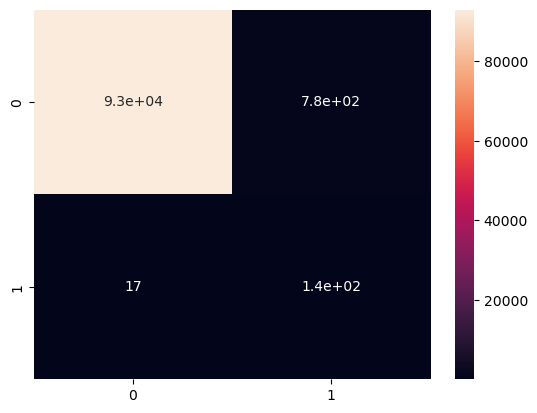

In [13]:
#Do some samplin'
#sampler = RandomOverSampler(n_jobs=-1)
#sampler = RandomUnderSampler(n_jobs=-1)
#sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
#sampler = SVMSMOTE(n_jobs=-1)

#Build Log Reg model
#Split Data x/y
y4 = np.array(df["Class"]).reshape(-1,1)
x4 = np.array(df.drop(columns={"Class"}))

X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.33)

#Look at relative imbalance after split
X_train4Samp, y_train4Samp = sampler.fit_resample(X_train4, y_train4)
print('Resampled dataset shape %s' % Counter(y_train4Samp))

#Normalize data
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train4_norm = scaler.fit_transform(X_train4Samp)
X_test4_norm = scaler.transform(X_test4)

#Train model
model4 = LogisticRegression(max_iter=1000, n_jobs=-1).fit(X_train4_norm,y_train4Samp.ravel())

#Make predictions
preds4 = model4.predict(X_test4_norm)

#Generate 1/0 results and show results
labels4 = binarize(np.array(preds4).reshape(-1,1), threshold=.5)
conf_matrix4 = confusion_matrix(y_test4,labels4)
sns.heatmap(conf_matrix4, annot=True)

print("F1:",f1_score(y_test4, labels4))
print("Acc:",accuracy_score(y_test4, labels4))
print("Recall:",recall_score(y_test4, labels4))
print("Precision:",precision_score(y_test4, labels4))

### Resampling Results?

What can we learn from all of this? We were not able to really make things extremely accurate, which sucks!

Some potential issues here:
<ul>
<li>This data may not be well suited to a logistic regression model. 
<li>We may have some features that we need to remove - perhaps there are confounding varaibles. 
<li>We could layer these things together - e.g. use SMOTE then random undersampling. 
</ul>

Just for fun we'll try one with a different type of model and see what we can get. The performance of any indivdual model isn't really super easy to predict in advance - there are some applications that are better suited to some models, but it isn't super determinative. Next semester we'll look at more and more comparisons. 

#### Try Another Algorithm

Below is the same code, but we swapped out Logistic Regression with a Random Forest - which is a tree based algorithm. 

這裡有一些潛在的問題：
<ul>
<li>此數據可能不太適合邏輯回歸模型。
<li>我們可能有一些需要刪除的功能 - 可能存在混雜變量。
<li>我們可以將這些東西疊加在一起 - 例如 使用 SMOTE 然後隨機欠採樣。
</ul>

只是為了好玩，我們將嘗試使用不同類型的模型，看看我們能得到什麼。 

任何單個模型的性能並不是真的超級容易提前預測——有些應用程序更適合某些模型，但它並不是超級決定性的。 

下學期我們會看到越來越多的比較。

#### 嘗試另一種算法

下面是相同的代碼，但我們用隨機森林換掉了邏輯回歸——這是一種基於樹的算法。

Resampled dataset shape Counter({0: 190482, 1: 190340})
F1: 0.8695652173913043
Acc: 0.9995850489961378
Recall: 0.8441558441558441
Precision: 0.896551724137931


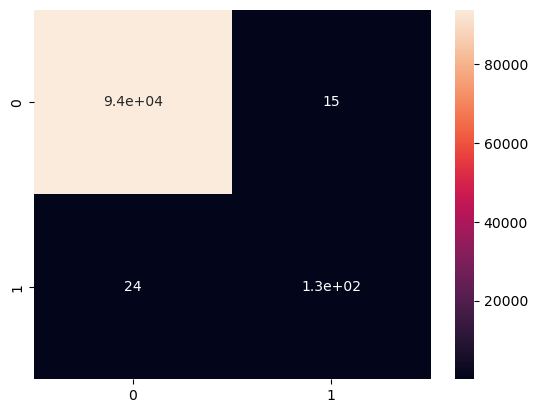

In [ ]:
sampler = ADASYN(n_jobs=-1)
#Split Data x/y
y5 = np.array(df["Class"]).reshape(-1,1)
x5 = np.array(df.drop(columns={"Class"}))

X_train5, X_test5, y_train5, y_test5 = train_test_split(x5, y5, test_size=0.33)

#Look at relative imbalance after split
X_train5Samp, y_train5Samp = sampler.fit_resample(X_train5, y_train5)
print('Resampled dataset shape %s' % Counter(y_train5Samp))

#Normalize data
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train5_norm = scaler.fit_transform(X_train5Samp)
X_test5_norm = scaler.transform(X_test5)

#Train model
model5 = RandomForestClassifier(n_jobs=-1).fit(X_train5_norm,y_train5Samp.ravel())
#Make predictions
preds5 = model5.predict(X_test5_norm)

#Generate 1/0 results and show results
labels5 = binarize(np.array(preds5).reshape(-1,1), threshold=.5)
conf_matrix5 = confusion_matrix(y_test5,labels5)
sns.heatmap(conf_matrix5, annot=True)

print("F1:",f1_score(y_test5, labels5))
print("Acc:",accuracy_score(y_test5, labels5))
print("Recall:",recall_score(y_test5, labels5))
print("Precision:",precision_score(y_test5, labels5))

## Finally!!!

Of all the things we tested, only swapping to a different algorithm really gave results that are bang on! Note that the raw accuracy isn't really different from the first try, but the other considerations for accuracy are better!

Based on this, we can probably make a reasonable assumption that the logistic regression algorithm just isn't all that well suited to the data. I would suspect that the relationships that allow us to make predictions are at least partially non-linear. This kind of variability between different models isn't particularly odd - as we improve things (more data, cleaner data, no outliers etc...) they will tend to converge as some of those data cleanup things can have dramatic effects on different types of models. The true answer for "which model to use" is almost always determined by a trial. 

Lastly on this part, we can see that the mechanics of building models is <i>mostly</i> the same for us. The math behind the scences that generates the models are totally different, but using them is nearly interchangable. 

在我們測試的所有東西中，只有換成不同的算法才能真正給出令人滿意的結果！

請注意，原始精度與第一次嘗試並沒有太大區別，但其他精度考慮因素更好！

基於此，我們可能可以做出一個合理的假設，即邏輯回歸算法並不是那麼適合數據。

我懷疑允許我們做出預測的關係至少部分是非線性的。

不同模型之間的這種可變性並不特別奇怪——隨著我們改進事物（更多數據、更清潔的數據、沒有異常值等......）它們將趨於收斂，因為其中一些數據清理事物會對不同類型產生巨大影響模型。 

“使用哪種模型”的真正答案幾乎總是由試驗決定。

最後，在這部分，我們可以看到構建模型的機制<i>大部分</i>對我們來說是相同的。生成模型的幕後數學完全不同，但使用它們幾乎可以互換。

## Exercise - Try it With Insurance Data

The value Response is the goal, and it is also not balanced. We also have a few categorical varaibles (read the data carefully), so we need a little data prep as well. 

值 Response 是目標，也是不平衡的。 我們還有一些分類變量（仔細閱讀數據），所以我們也需要一些數據準備。

In [ ]:
df2_ = pd.read_csv("data/aug_train.csv.zip")
df2_.drop(columns={"id"}, inplace=True)
df2_.sample(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
211313,Male,58,1,41.0,0,1-2 Year,Yes,32078.0,124.0,273,1
188868,Female,75,1,15.0,1,1-2 Year,No,23542.0,152.0,145,0
370535,Female,42,1,41.0,0,1-2 Year,Yes,37996.0,109.0,72,0
184390,Male,39,1,28.0,0,1-2 Year,Yes,2630.0,26.0,96,1
32278,Female,28,1,41.0,0,< 1 Year,Yes,35696.0,152.0,263,0
348285,Male,59,1,4.0,1,1-2 Year,No,28920.0,26.0,13,0
238981,Male,67,1,28.0,0,1-2 Year,Yes,60739.0,122.0,163,0
293568,Female,21,1,13.0,0,< 1 Year,Yes,26854.0,160.0,225,0
5799,Female,25,1,7.0,0,< 1 Year,Yes,36115.0,152.0,72,0
128410,Female,34,1,8.0,0,1-2 Year,Yes,2630.0,152.0,255,0


<AxesSubplot:xlabel='Response', ylabel='count'>

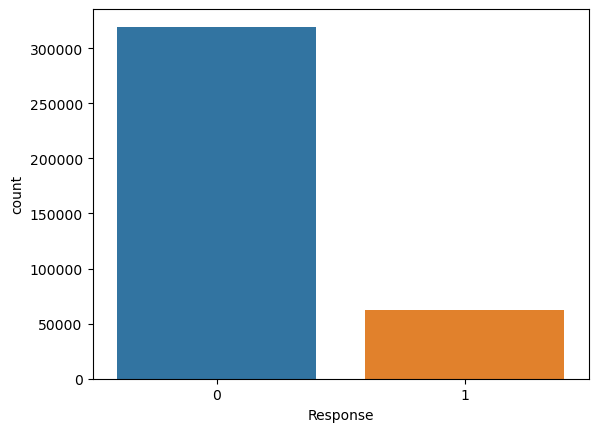

In [ ]:
sns.countplot(data=df2_, x="Response")

In [ ]:
df2_.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
df2_[["Gender", "Driving_License", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage"]] = df2_[["Gender", "Driving_License", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage"]].astype("category")
df2_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Gender                382154 non-null  category
 1   Age                   382154 non-null  int64   
 2   Driving_License       382154 non-null  category
 3   Region_Code           382154 non-null  float64 
 4   Previously_Insured    382154 non-null  category
 5   Vehicle_Age           382154 non-null  category
 6   Vehicle_Damage        382154 non-null  category
 7   Annual_Premium        382154 non-null  float64 
 8   Policy_Sales_Channel  382154 non-null  float64 
 9   Vintage               382154 non-null  int64   
 10  Response              382154 non-null  int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 19.3 MB


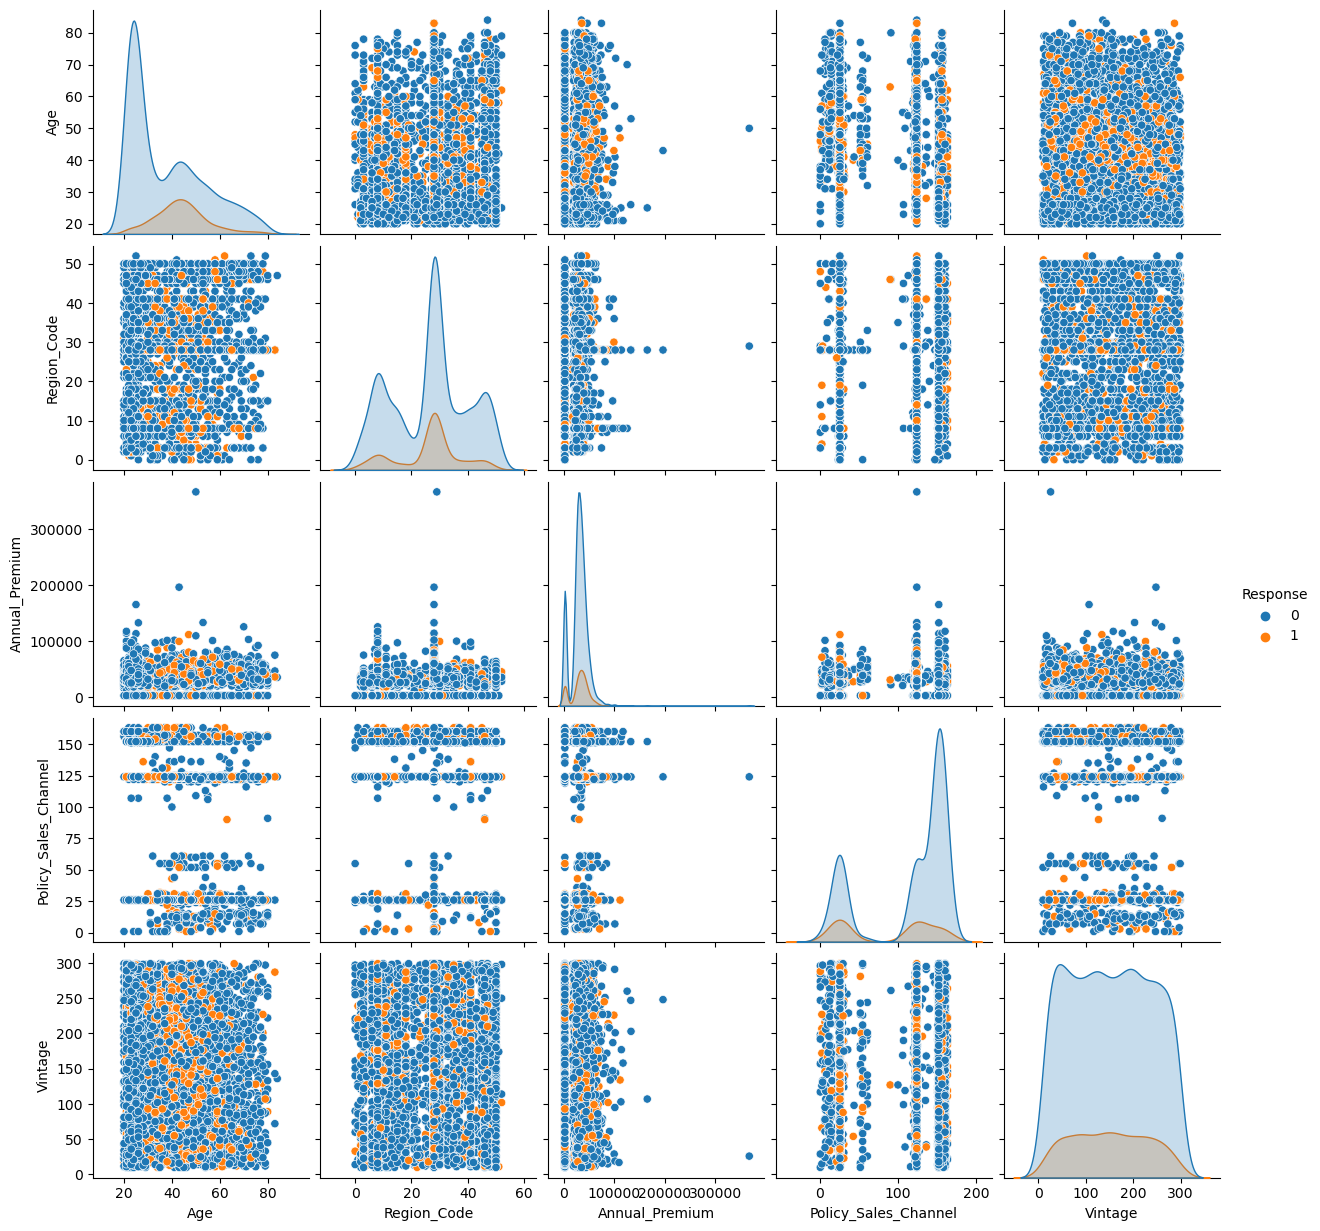

In [ ]:
sns.pairplot(df2_.sample(5000), hue="Response")

##### Make Dummies

In [ ]:
df2 = pd.get_dummies(df2_)
df2.sample(10)

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Driving_License_0,Driving_License_1,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
28296,23,6.0,21813.0,152.0,37,0,1,0,0,1,0,1,0,1,0,1,0
243323,49,28.0,36867.0,26.0,177,0,1,0,0,1,1,0,1,0,0,0,1
113394,64,31.0,2630.0,26.0,275,0,0,1,0,1,0,1,1,0,0,1,0
300200,23,30.0,2630.0,152.0,134,1,1,0,0,1,1,0,0,1,0,0,1
185500,57,33.0,27803.0,26.0,287,0,1,0,0,1,0,1,1,0,0,1,0
103316,26,46.0,31693.0,152.0,47,0,0,1,0,1,0,1,0,1,0,1,0
30439,22,30.0,25818.0,152.0,92,0,1,0,0,1,0,1,0,1,0,1,0
315054,24,6.0,29996.0,152.0,99,0,1,0,0,1,0,1,0,1,0,1,0
74031,22,29.0,20553.0,152.0,199,0,1,0,0,1,0,1,0,1,0,1,0
318739,69,50.0,23688.0,8.0,173,0,0,1,0,1,1,0,1,0,0,0,1


##### Remove Some Outliers

In [ ]:
df2 = df2[df2["Annual_Premium"] < 175000]

##### Model

Resampled dataset shape Counter({1: 218530, 0: 214238})
F1: 0.5222755857457478
Acc: 0.7143718369742833
Recall: 0.9435309908441589
Precision: 0.3610698365527489


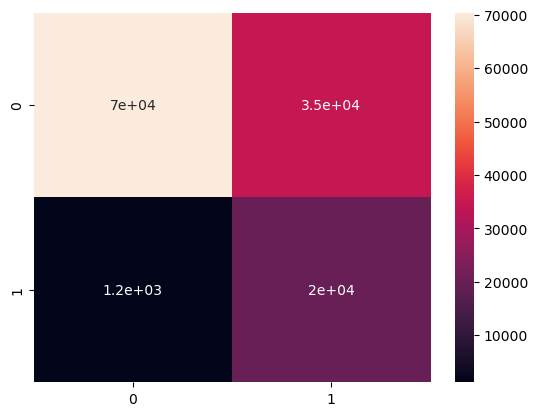

In [ ]:
sampler = ADASYN(n_jobs=-1)

#Split Data x/y
y6 = np.array(df2["Response"]).reshape(-1,1)
x6 = np.array(df2.drop(columns={"Response"}))

X_train6, X_test6, y_train6, y_test6 = train_test_split(x6, y6, test_size=0.33)

#Look at relative imbalance after split
X_train6Samp, y_train6Samp = sampler.fit_resample(X_train6, y_train6)
print('Resampled dataset shape %s' % Counter(y_train6Samp))

#Normalize data
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train6_norm = scaler.fit_transform(X_train6Samp)
X_test6_norm = scaler.transform(X_test6)

#Train model
model6 = LogisticRegression(n_jobs=-1).fit(X_train6_norm,y_train6Samp.ravel())
#Make predictions
preds6 = model6.predict(X_test6_norm)

#Generate 1/0 results and show results
labels6 = binarize(np.array(preds6).reshape(-1,1), threshold=.5)
conf_matrix6 = confusion_matrix(y_test6,labels6)
sns.heatmap(conf_matrix6, annot=True)

print("F1:",f1_score(y_test6, labels6))
print("Acc:",accuracy_score(y_test6, labels6))
print("Recall:",recall_score(y_test6, labels6))
print("Precision:",precision_score(y_test6, labels6))